<a href="https://colab.research.google.com/github/ilmechaJu/Machine_Learning/blob/main/ch_12_%EB%8B%A4%EC%96%91%EC%B2%B4_%ED%95%99%EC%8A%B5(Manifold_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_0011.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [ ]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [ ]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = rand_proj.fit_transform(digits)

In [ ]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [ ]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [ ]:
def plot_digits(digits, labels, position, projection):
  digits = min_max_scale(digits)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})

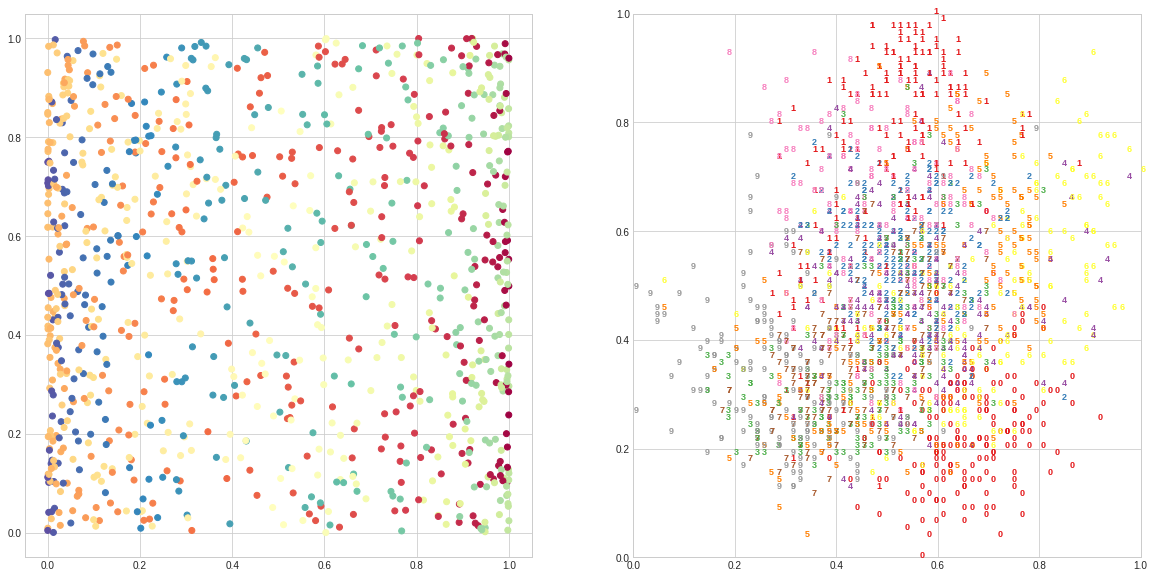

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

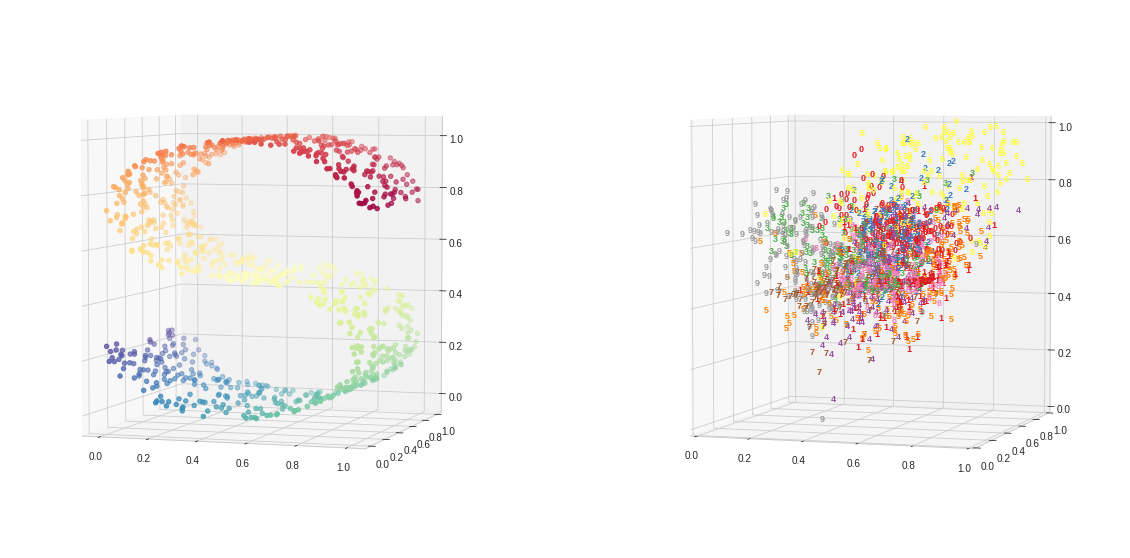

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [ ]:
s_curve_lie = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='standard', random_state=0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='standard', random_state=0).fit_transform(digits)                                              

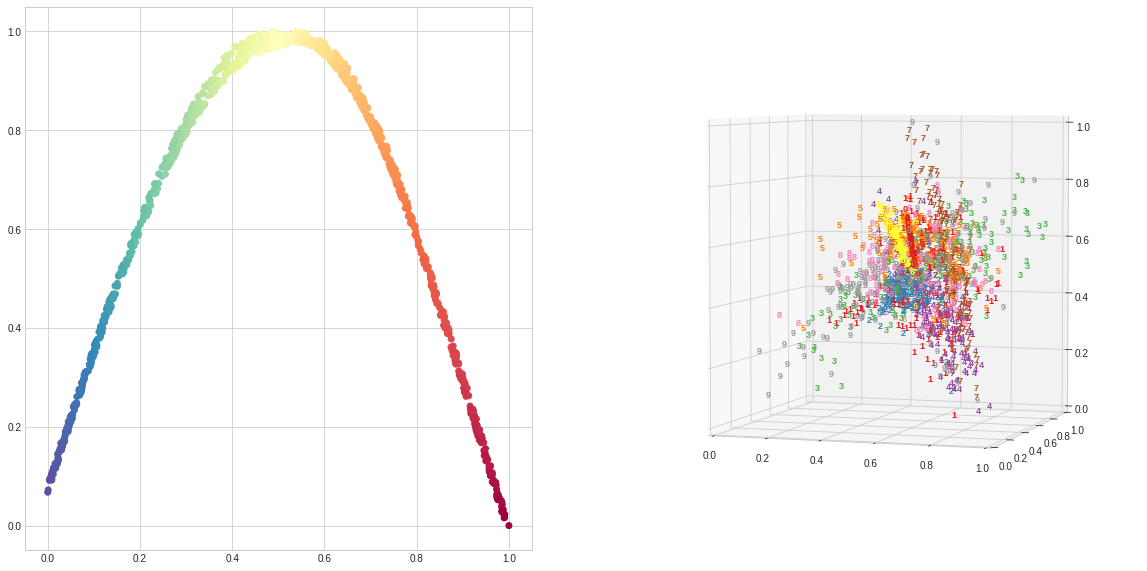

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lie, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [ ]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='ltsa', random_state=0).fit_transform(s_curve)
digits_ltsa= manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='ltsa', random_state=0).fit_transform(digits)                                              

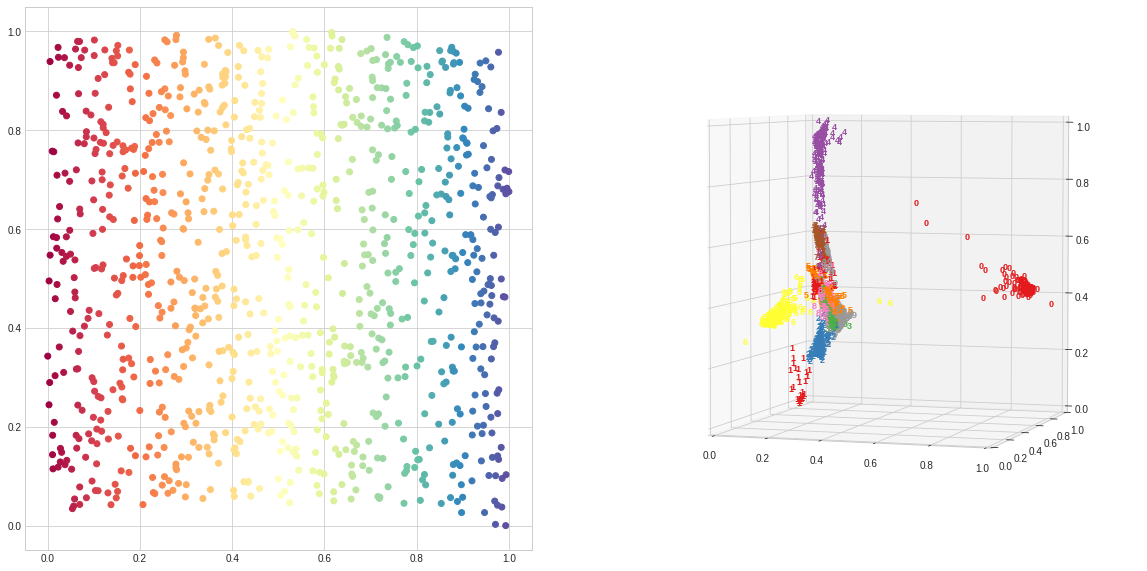

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [ ]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='hessian', random_state=0).fit_transform(s_curve)
digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='hessian', random_state=0).fit_transform(digits)                                              

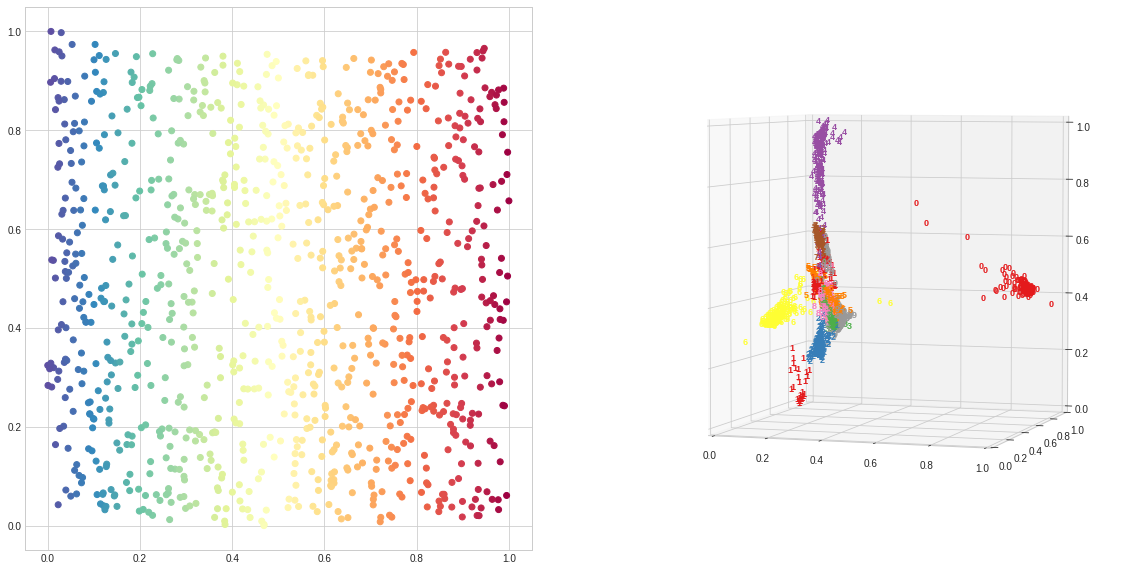

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [ ]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='modified', random_state=0).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='modified', random_state=0).fit_transform(digits)                                              

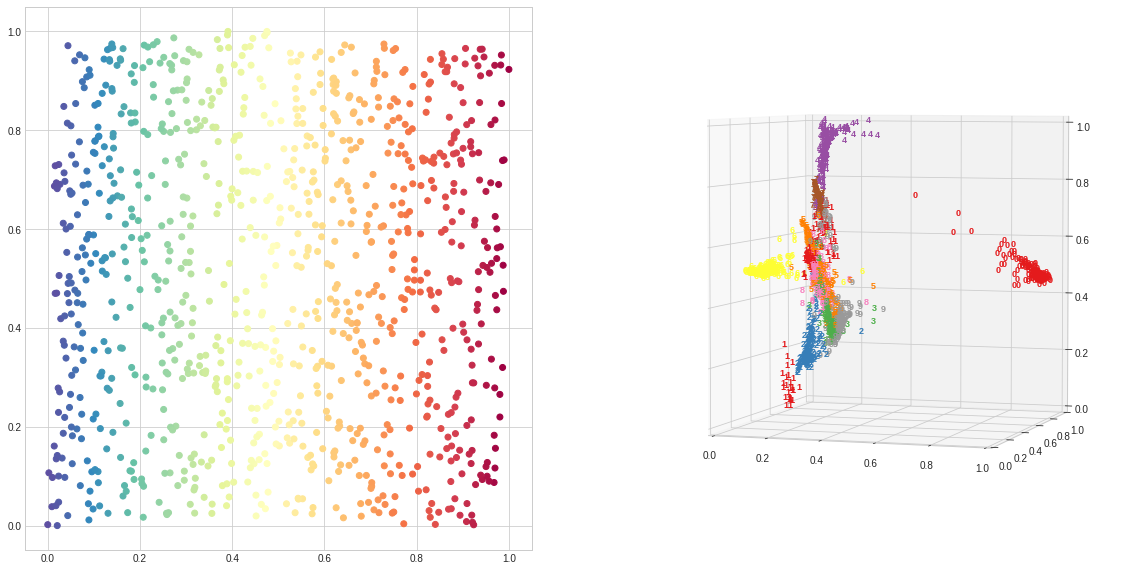

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [ ]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2,).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3,).fit_transform(digits)                                              

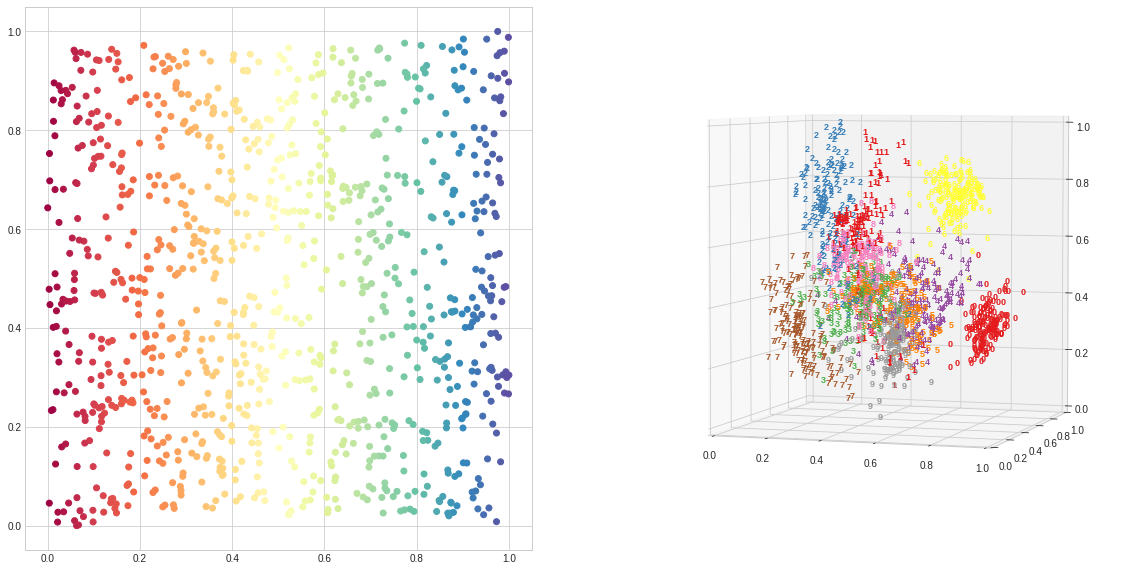

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [ ]:
s_curve_mds = manifold.MDS(n_components=2, random_state=0).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(digits)                                              

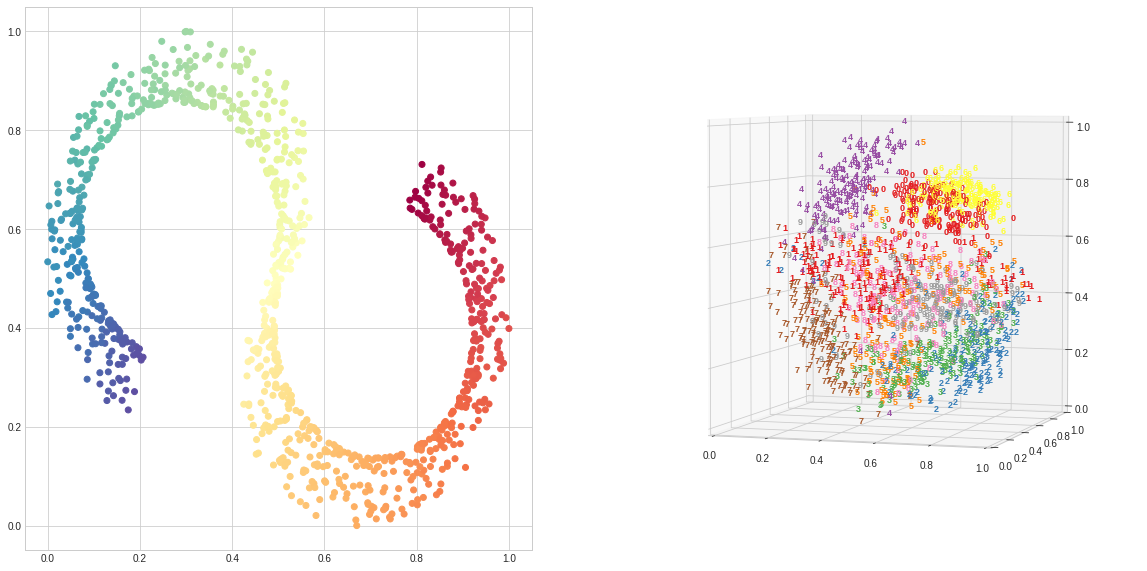

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [ ]:
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
digits_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)                                              

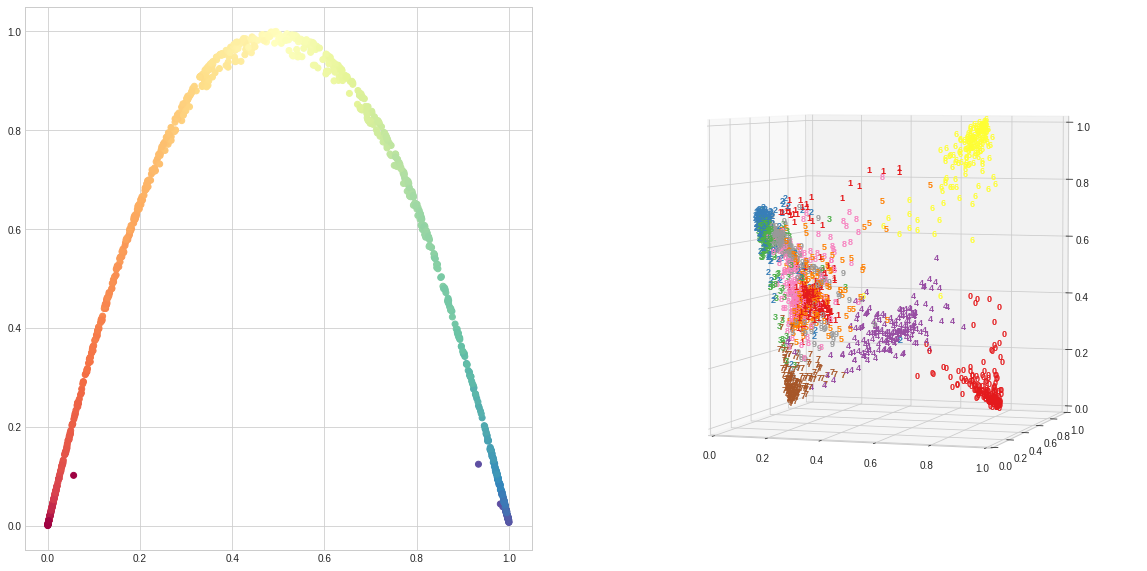

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [ ]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(digits)                                              

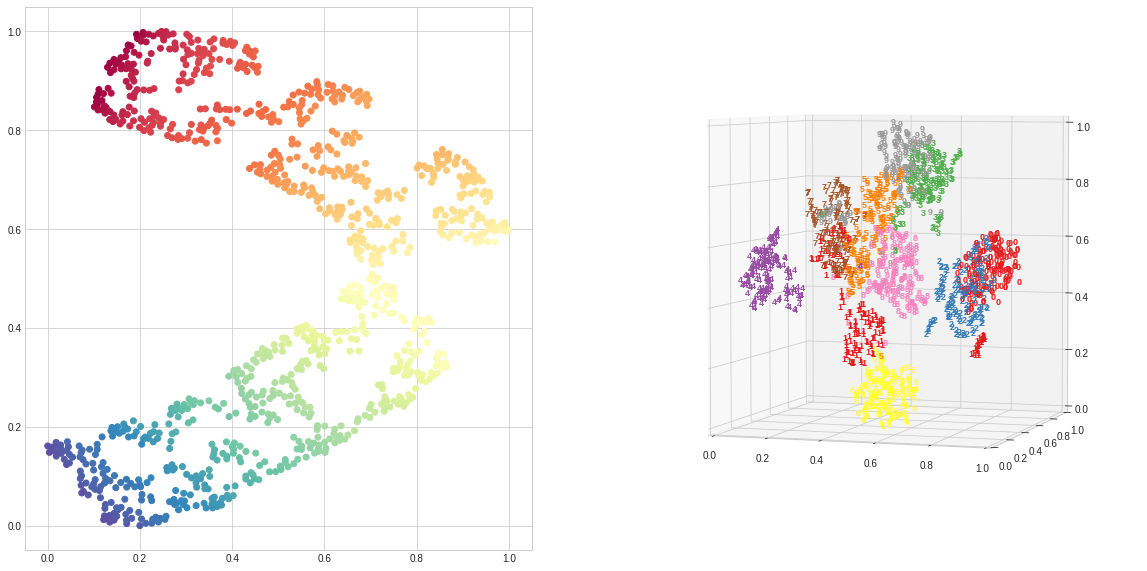

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [ ]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree =DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [ ]:
score = cross_val_score(
    estimator=knn,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9627282575054161 (+/-0.011168537355954218)


#### SVM

In [ ]:
score = cross_val_score(
    estimator=svm,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/-0.02008605863225686)


#### Decision Tree

In [ ]:
score = cross_val_score(
    estimator=decision_tree,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.78333333, 0.72777778, 0.80779944, 0.84122563, 0.7994429 ])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/-0.02008605863225686)


#### Random Forest

In [ ]:
score = cross_val_score(
    estimator=random_forest,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.93611111, 0.91944444, 0.94986072, 0.9637883 , 0.9275766 ])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9393562364593006 (+/-0.015830604085792645)


### 정제된 데이터를 사용할 때

#### KNN

In [ ]:
score = cross_val_score(
    estimator=knn,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.96111111, 0.96944444, 0.98885794, 0.99164345, 0.97214485])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9766403590219745 (+/-0.011726128697800348)


#### SVM

In [ ]:
score = cross_val_score(
    estimator=svm,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.94722222, 0.94722222, 0.98607242, 0.99164345, 0.96935933])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9683039306716186 (+/-0.018710656952361866)


#### Decision Tree

In [ ]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.925     , 0.90555556, 0.96657382, 0.96935933, 0.93314763])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9399272670999691 (+/-0.0246027896608228)


#### Random Forest

In [ ]:
score = cross_val_score(
    estimator=random_forest,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.94722222, 0.92777778, 0.98885794, 0.98607242, 0.94707521])

In [ ]:
print('mean cross val score: {} (+/-{})'.format(score.mean(), score.std()))

mean cross val score: 0.9594011142061282 (+/-0.023997299858457707)
